<a href="https://colab.research.google.com/github/SPThole/Interactive_EDA/blob/main/Interactive_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
#@title


In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, interact_manual
%matplotlib inline
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

pd.set_option('display.max_rows', 500)

# Tasks

* [X] Checking duplicates
* [X] Checking NAs
* [X] Checking shape of dataframe

In [ ]:
#@title
class sanity_checks:

  def __init__(self,
               df):
    """
    This class is written for basic and simple sanity checks
    """
    self.df = df.copy()

  def duplicates_rows(self):
    """
    Function which shows if duplicates present in rows
    """
    if self.df.drop_duplicates().shape[0]==self.df.shape[0]:
      print('No Duplicates')
      print('==============================')
    else:
      print(f'# Duplicate rows: {self.df.drop_duplicates().shape[0]-self.df.shape[0]}')
      print('==============================')

  def null_check(self):
    """
    Function which shows columns with top na percentages
    """
    print(self.df.isna().sum().sort_values(ascending=False)/\
          self.df.shape[0])
    print('==============================')
    print('columns with NAs')
    print(self.df.columns[df.isnull().any()])
    print('==============================')
  
  def duplicates_cols(self):
    """
    Duplicate columns
    """
    if (True in self.df.columns.duplicated()):
      print('Duplicated Columns present')
      print('==============================')
    else:
      print('No duplicated columns present')
      print('==============================')

  def shape_check(self):
    """
    Gives the shape of the dataframe
    """
    print(f'Shape: {self.df.shape}')
    print('==============================')

  def run_sanity_checks(self):
    """
    This runs all sanity checks at once
    """
    print('Running Sanity Checks')
    print('==============================')
    self.duplicates_rows()
    self.duplicates_cols()
    self.null_check()
    self.shape_check()






In [ ]:
df = pd.read_csv('/content/bank.csv',sep=';')

In [ ]:
sanity_checker = sanity_checks(df)

In [ ]:
sanity_checker.run_sanity_checks()

Running Sanity Checks
No Duplicates
No duplicated columns present
y            0.0
loan         0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
contact      0.0
poutcome     0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
age          0.0
dtype: float64
columns with NAs
Index([], dtype='object')
Shape: (4521, 17)


# EDA

In [ ]:

class auto_eda:
  def __init__(self,
               df,
               target,
               task):
    """
    """
    self.df = df
    self.target = target
    self.task = task

  def cols_type(self):
    """
    """
    print(f'dtypes of columns:{list(self.df.dtypes.unique())}')
    print('===========================')
    for t in list(self.df.dtypes.unique()):
      print(t)
      print(self.df.select_dtypes(t).columns)
      print('===========================')

  def countplots(self):
    """
    """
    cols = self.df.select_dtypes(['object','int']).columns
    @interact_manual
    def plot_countplots(col=list(cols)+[None]):
      sns.countplot(x=col, data=self.df)
      plt.xticks(rotation=90)
      plt.show()

  
  def barplots(self):
    """
    """
    @interact_manual
    def plot_barplots(x= list(self.df.columns)+[None],
                      hue = list(self.df.columns)+[None],
                      y = list(self.df.columns)+[None]
                      ):
      try:
        sns.barplot(x=x,y=y,hue=hue,data = self.df)
        plt.show()
      except:
        print('Error: Wrong column dtype combination')

  def histoplot(self):
    """
    """
    @interact_manual
    def plot_histplot(x=list(self.df.columns)+[None],
                      hue=list(self.df.columns)+[None],
                      bins=np.arange(10,100,1),
                      kde=True):
      sns.histplot(data = self.df, x=x, hue=hue, bins=bins)
      plt.show()

  def boxplot(self):
    """
    """
    cols = self.df.select_dtypes(['float','int']).columns
    hue_cols = self.df.select_dtypes(['object','int']).columns
    @interact_manual
    def plot_boxplot(x=list(cols)+[None],
                     hue=list(hue_cols)+[None]):
      sns.boxplot(data = self.df, x=x,hue = hue)
      plt.show()

  def trendline(self):
    """
    """
    cols = self.df.select_dtypes(['datetime', 'timedelta','float','int']).columns
    @interact_manual
    def plot_trendline(x=list(cols)+[None],
                       y=list(cols)+[None]):
      sns.lineplot(data = self.df, x=x, y=y)
      plt.show()

  def scatterplot(self):
    """
    """
    cols = self.df.select_dtypes(['float','int']).columns
    cols_hue = self.df.select_dtypes(['object','int']).columns
    @interact_manual
    def plot_scatterplot(x=list(cols)+[None],
                       y=list(cols)+[None],
                       hue=list(cols_hue)+[None],
                       size=list(cols)+[None] ):
      sns.scatterplot(data=self.df, x=x, y=y, hue=hue, size=size)
      plt.show()

  def lmplots(self):
    """
    """
    cols = self.df.select_dtypes(['float','int']).columns
    cols_hue = self.df.select_dtypes(['object','int']).columns
    @interact_manual
    def plot_lmplot(x=list(cols)+[None],
                       y=list(cols)+[None],
                       hue=list(cols_hue)+[None],
                       ):
      sns.lmplot(data=self.df, x=x, y=y, hue=hue)
      plt.show()

  def jointplots(self):
    """
    """
    cols = self.df.select_dtypes(['float','int']).columns
    cols_hue = self.df.select_dtypes(['object','int']).columns
    @interact_manual
    def plot_jointplot(x=list(cols)+[None],
                       y=list(cols)+[None],
                       hue=list(cols_hue)+[None],
                       ):
      sns.jointplot(data=self.df, x=x, y=y, hue=hue,kind='kde')
      plt.show()


  def correlations(self,how='total'):
    """
    """
    cols = self.df.select_dtypes(['float','int']).columns
    if how=='few':
      @interact_manual
      def plot_corr(x=list(cols)+[None],
                    y=list(cols)+[None],
                    method='spearman'):
        """
        """
        print(f'correlation:{self.df[x].corr(self.df[y])}')
    if how=='total':
      sns.heatmap(self.df[list(cols)].corr(),annot=False)
      plt.show()

  def pairplots(self):
    """
    """
    cols = self.df.select_dtypes(['object']).columns
    @interact_manual
    def plot_pairplot(hue=list(cols)+[None]):
      sns.pairplot(self.df,hue=hue)

  def facetplot(self,types='scatter'):
    """
    """
    cols_h = self.df.select_dtypes(['object']).columns
    cols = self.df.select_dtypes(['float','int']).columns
    @interact_manual
    def plot_facet(col = list(cols_h)+[None],
                   row = list(cols_h)+[None],
                   col1= list(cols)+[None],
                   col2 = list(cols)+[None]):
      if types=='scatter':
        g = sns.FacetGrid(self.df, col=col,  row=row)
        g.map(sns.scatterplot, col1, col2)
      if types=='histplot':
        g = sns.FacetGrid(self.df, col=col,  row=row)
        g.map(sns.histplot, col1)
  
  def manifolds(self,perplexity,hue=None):
    """
    """
    cols = self.df.select_dtypes(['float','int']).columns
    from sklearn.manifold import TSNE
    trns_X = TSNE(n_components=2,perplexity=perplexity).\
    fit_transform(self.df[cols].values)
    sns.scatterplot(trns_X[:,0],trns_X[:,1],hue=hue)
    plt.show()
    





  


  

  


        







    





    






    


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
eda = auto_eda(df,'y','clf')

# Manifolds

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


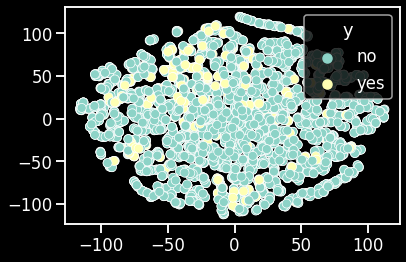

In [ ]:
eda.manifolds(5,hue=eda.df['y'])

# Countplot

In [ ]:
eda.countplots()

interactive(children=(Dropdown(description='col', options=('age', 'job', 'marital', 'education', 'default', 'b…

# Histplot

In [ ]:
eda.histoplot()

interactive(children=(Dropdown(description='x', options=('age', 'job', 'marital', 'education', 'default', 'bal…

# Barplots

In [ ]:
eda.barplots()

interactive(children=(Dropdown(description='x', options=('age', 'job', 'marital', 'education', 'default', 'bal…

# Boxplot

In [ ]:
eda.boxplot()

interactive(children=(Dropdown(description='x', options=('age', 'balance', 'day', 'duration', 'campaign', 'pda…

# Trendline

In [ ]:
eda.trendline()

interactive(children=(Dropdown(description='x', options=('age', 'balance', 'day', 'duration', 'campaign', 'pda…

# Scatterplot

In [ ]:
eda.scatterplot()

interactive(children=(Dropdown(description='x', options=('age', 'balance', 'day', 'duration', 'campaign', 'pda…

# Lmplots

In [ ]:
eda.lmplots()

interactive(children=(Dropdown(description='x', options=('age', 'balance', 'day', 'duration', 'campaign', 'pda…

# Jointplots

In [ ]:
eda.jointplots()

interactive(children=(Dropdown(description='x', options=('age', 'balance', 'day', 'duration', 'campaign', 'pda…

# Correlations

In [ ]:
eda.correlations(how='few')

interactive(children=(Dropdown(description='x', options=('age', 'balance', 'day', 'duration', 'campaign', 'pda…

# Pairplots

In [ ]:
eda.pairplots()

interactive(children=(Dropdown(description='hue', options=('job', 'marital', 'education', 'default', 'housing'…

# Facetplot

In [ ]:
eda.facetplot()

interactive(children=(Dropdown(description='col', options=('job', 'marital', 'education', 'default', 'housing'…